In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shapefile
import shapely
import xarray as xr

In [2]:
hydrofile = r".\Data\Hydrological data.xlsx"
df = pd.read_excel(hydrofile, engine='openpyxl')

In [3]:
dh1t = df.loc[df.Name=='Hydr 1']
dh2t = df.loc[df.Name=='Hydr 2']
dh3t = df.loc[df.Name=='Hydr 3']

In [4]:
dh1 = dh1t.set_index('Date (mm-yy)')
dh2 = dh2t.set_index('Date (mm-yy)')
dh3 = dh3t.set_index('Date (mm-yy)')

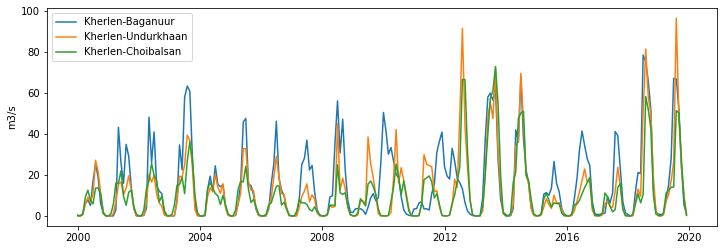

In [5]:
plt.figure(figsize=(12,4))
plt.plot(dh1.index, dh1['Discharge, m3/s'], label='Kherlen-Baganuur')
plt.plot(dh2.index, dh2['Discharge, m3/s'], label='Kherlen-Undurkhaan')
plt.plot(dh3.index, dh3['Discharge, m3/s'], label='Kherlen-Choibalsan')
plt.ylabel('m3/s')
plt.legend();

In [6]:
locfile = r".\Data\hydrological_gauges.shp"
shape = shapefile.Reader(locfile)
#first feature of the shapefile
Hcoords = {}
for feature in shape.shapeRecords():
#feature = shape.shapeRecords()[0]
    first = feature.shape.__geo_interface__  
    Hcoords[feature.record[4]] = first['coordinates']
Hcoords

{'Hydr 1': (108.45, 47.7),
 'Hydr 2': (110.66667, 47.31667),
 'Hydr 3': (114.5, 48.06667)}

Balance from yearly .nc

In [7]:
p = xr.open_dataset(r".\Data\precipitation_yearly.nc")
et = xr.open_dataset(r".\Data\evapotranspiration_yearly.nc")
pvar = p.precipitation
etvar = et.evapotranspiration

In [8]:
mean_p = pvar.mean(dim=['latitude','longitude'])
mean_et = etvar.mean(dim=['latitude','longitude'])
p_m_et = mean_p-mean_et

In [9]:
dh3y = dh3.resample('Y').mean()
dh3y = dh3y.loc[dh3y.index.year>2004]
years = list(range(2005,2021))


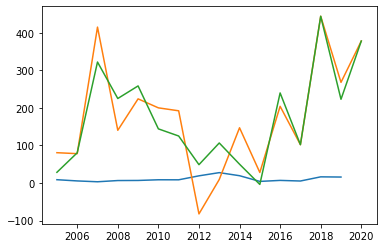

In [10]:
plt.plot(list(range(2005,2020)), dh3y['Discharge, m3/s'])
#plt.plot(list(range(2005,2021)), (mean_p.values)*106487.30*1000/365/24/60/60)
#plt.plot(list(range(2005,2021)), (mean_et.values)*106487.30*1000/365/24/60/60)

plt.plot(list(range(2005,2021)),
         (p_m_et.values-[-18.2,0.8,-32.4,29.5,12,-19.5,-23.4,45.7,33.9,-33.8,-11.1,12.4,0, 0, -15.7,0])*106487.30*1000/365/24/60/60*.85)
plt.plot(list(range(2005,2021)),
         (p_m_et.values)*106487.30*1000/365/24/60/60*.85)

Text(0, 0.5, 'ET [mm/year]')

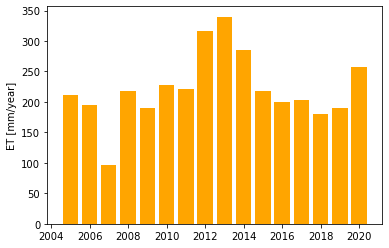

In [11]:
#save_folder = r".\Plots"
plt.bar(list(range(2005,2021)),mean_et, color='orange')
plt.ylabel('ET [mm/year]')
#plt.savefig(os.path.join(save_folder, 'ETbar'))

Meteo Data

In [12]:
meteofile = r".\Data\Meteorological data.xlsx"
df = pd.read_excel(meteofile, engine='openpyxl')

In [13]:
dm1t = df.loc[df.Name=='Meteo 1']
dm2t = df.loc[df.Name=='Meteo 2']
dm3t = df.loc[df.Name=='Meteo 3']
dm4t = df.loc[df.Name=='Meteo 4']
dm5t = df.loc[df.Name=='Meteo 5']
dm6t = df.loc[df.Name=='Meteo 6']

In [14]:
dd1 = dm1t.set_index('Date')
dd2 = dm2t.set_index('Date')
dd3 = dm3t.set_index('Date')
dd4 = dm4t.set_index('Date')
dd5 = dm5t.set_index('Date')
dd6 = dm6t.set_index('Date')

In [15]:
dm1 = dd1.resample('M').sum()
dm2 = dd2.resample('M').sum()
dm3 = dd3.resample('M').sum()
dm4 = dd4.resample('M').sum()
dm5 = dd5.resample('M').sum()
dm6 = dd6.resample('M').sum()

dm1.index = [datetime.datetime(i.year, i.month, 1) for i in dm1.index]
dm2.index = [datetime.datetime(i.year, i.month, 1) for i in dm2.index]
dm3.index = [datetime.datetime(i.year, i.month, 1) for i in dm3.index]
dm4.index = [datetime.datetime(i.year, i.month, 1) for i in dm4.index]
dm5.index = [datetime.datetime(i.year, i.month, 1) for i in dm5.index]
dm6.index = [datetime.datetime(i.year, i.month, 1) for i in dm6.index]

In [16]:
dmdic = {'Meteo 1': dm1,
         'Meteo 2': dm2,
         'Meteo 3': dm3,
         'Meteo 4': dm4,
         'Meteo 5': dm5,
         'Meteo 6': dm6,
        }

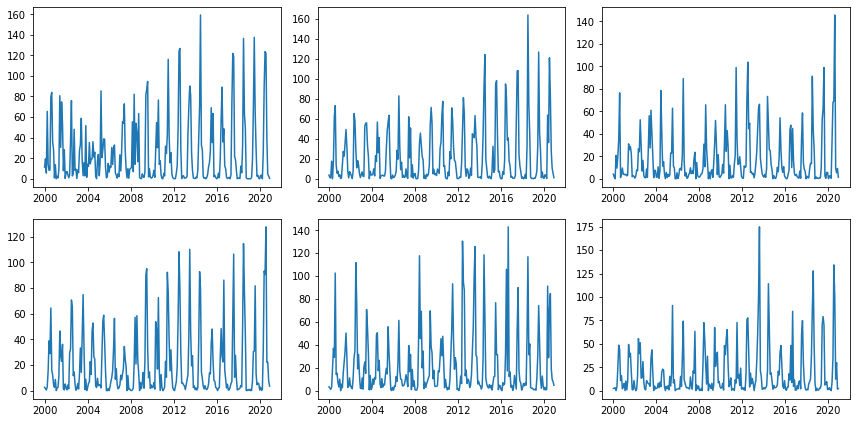

In [17]:
plt.figure(figsize=(12,6))
for (i,dm) in enumerate([dm1,dm2,dm3,dm4,dm5,dm6]):
    plt.subplot(2,3,i+1)
    plt.plot(dm.index, dm['Precipitation, mm'])
plt.tight_layout()

In [18]:
locfile = r".\Data\meteorological_stats.shp"
shape = shapefile.Reader(locfile)
#first feature of the shapefile
Mcoords = {}
for feature in shape.shapeRecords():
#feature = shape.shapeRecords()[0]
    first = feature.shape.__geo_interface__  
    Mcoords[feature.record[11]] = first['coordinates']
Mcoords

{'Meteo 6': (114.52, 48.07),
 'Meteo 1': (108.5, 48.2),
 'Meteo 2': (108.23, 47.47),
 'Meteo 3': (109.42, 46.58),
 'Meteo 5': (112.12, 47.78),
 'Meteo 4': (110.67, 47.32)}

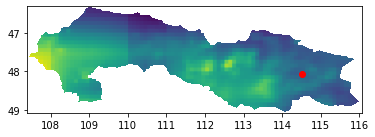

In [19]:
#%matplotlib tk
#p = xr.open_dataset(r"K:\WB_Mongolia\Kherlen_nc_files\Kherlen_CGLS500_P_GPM.nc", chunks=500)
p_path = r".\Data\p_monthly.nc"
p = xr.open_dataset(p_path, chunks=500)
extent = extent=(p.longitude[0],p.longitude[-1],p.latitude[-1],p.latitude[0])
plt.imshow(p.precipitation[0], extent=extent)
plt.scatter(114.52, 48.07, color='r')

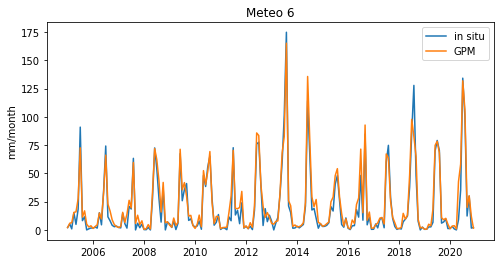

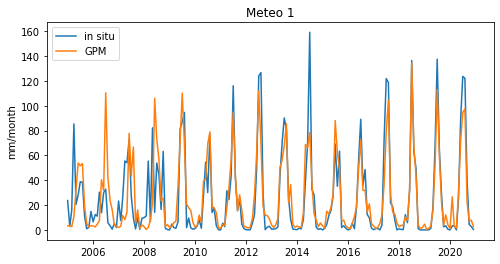

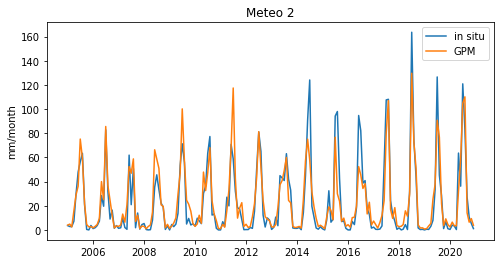

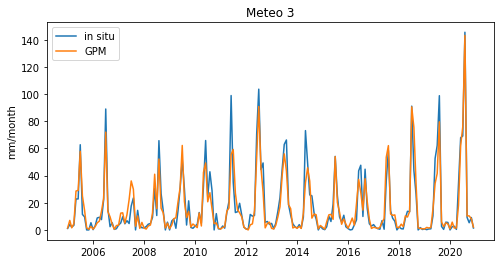

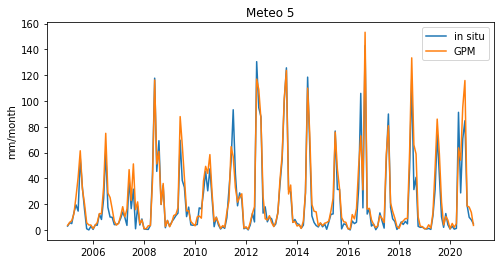

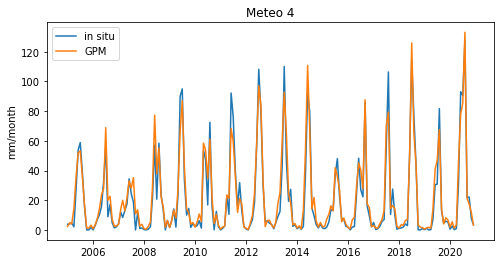

In [20]:
#save_folder = r".\Plots"
#plt.figure(figsize=(12,6))
for i, stat in enumerate(Mcoords):
#    plt.subplot(2,3,i+1)
    plt.figure(figsize=(8,4))
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][60:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot(df1.index, df1['Precipitation, mm'], label = 'in situ')
    plt.plot(psel.time, psel.precipitation.values, label = 'GPM')
    plt.title(stat)
    plt.ylabel('mm/month')
    plt.legend()
    plt.show()
    #plt.savefig(os.path.join(save_folder, stat))
    plt.close()
#plt.tight_layout()

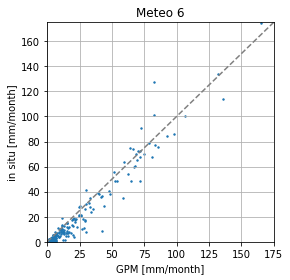

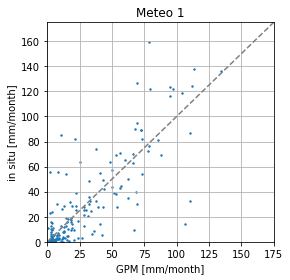

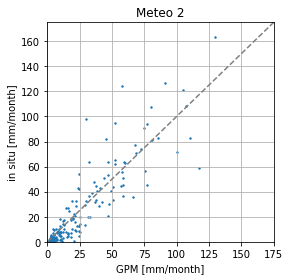

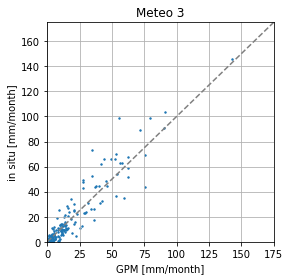

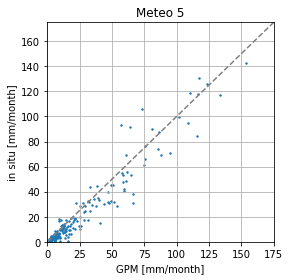

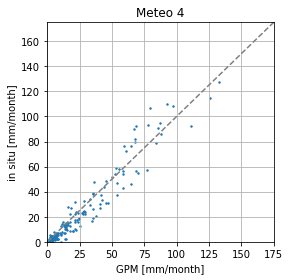

In [21]:
#plt.figure(figsize=(12,6))
for i, stat in enumerate(Mcoords):
#    plt.subplot(2,3,i+1)
    plt.figure(figsize=(4,4))
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][60:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot([0,175],[0,175],'--', color='grey')
    plt.scatter(psel.precipitation.values, df1['Precipitation, mm'], s=2)
    plt.title(stat)
    plt.xlabel('GPM [mm/month]')
    plt.ylabel('in situ [mm/month]')
    plt.tight_layout()
    plt.grid()
    plt.xlim([0,175])
    plt.ylim([0,175])
    #plt.savefig(os.path.join(save_folder, stat+'_scatter'))
    plt.show()
    plt.close()
#plt.tight_layout()

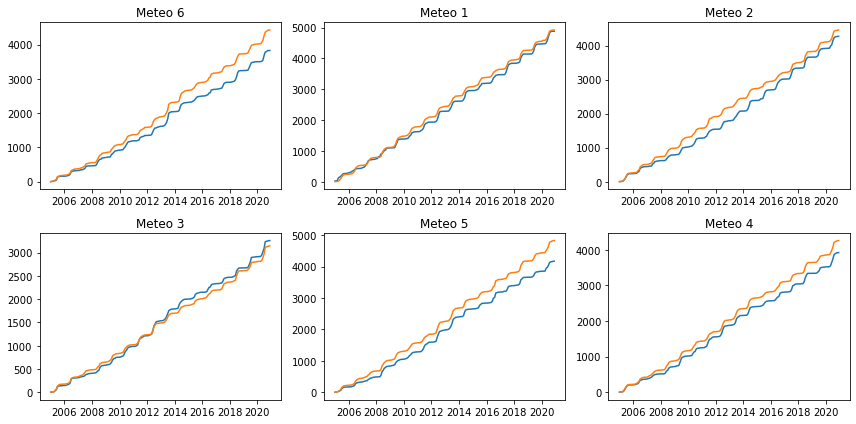

In [22]:
plt.figure(figsize=(12,6))
for i, stat in enumerate(Mcoords):
    plt.subplot(2,3,i+1)
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][60:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot(df1.index, np.cumsum(df1['Precipitation, mm']))
    plt.plot(psel.time, np.cumsum(psel.precipitation.values))
    plt.title(stat)
plt.tight_layout()

In [23]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

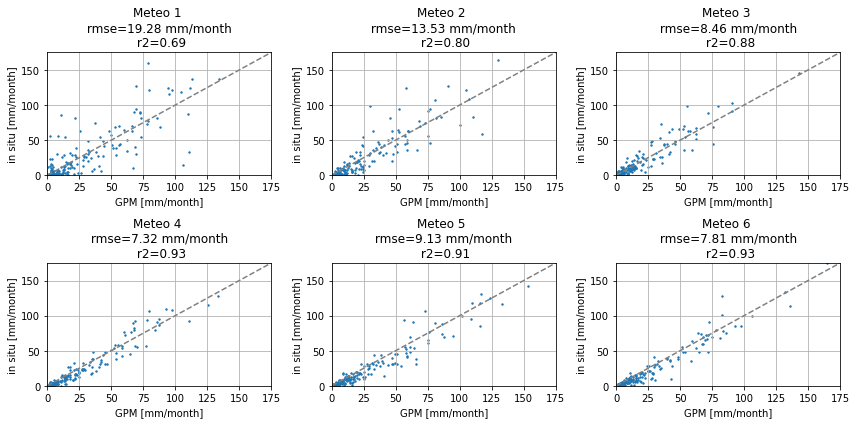

In [24]:
plt.figure(figsize=(12,6))
for i, stat in enumerate(sorted(Mcoords)):
    plt.subplot(2,3,i+1)
#    plt.figure(figsize=(4,4))
    lon = Mcoords[stat][0]
    lat = Mcoords[stat][1]
    df1 = dmdic[stat][60:]
    psel = p.sel(longitude=lon, latitude=lat, method ='nearest')
    plt.plot([0,175],[0,175],'--', color='grey')
    plt.scatter(psel.precipitation.values, df1['Precipitation, mm'], s=2)
    rmse = mean_squared_error(df1['Precipitation, mm'], psel.precipitation.values, squared=False)
    r2 = r2_score(df1['Precipitation, mm'], psel.precipitation.values)
    plt.title('{} \n rmse={:.2f} mm/month \n r2={:.2f}'.format(stat, rmse, r2))#stat+'\n rmse = '+str(rmse)+' r2= '+str(r2))
    plt.xlabel('GPM [mm/month]')
    plt.ylabel('in situ [mm/month]')
    plt.tight_layout()
    plt.grid()
    plt.xlim([0,175])
    plt.ylim([0,175])
#plt.savefig(os.path.join(save_folder,'all_meteo_scatter'))

#    plt.close()